In [ ]:
import random as rd
import numpy
import sys
import time
import matplotlib.pyplot as plt

sys.setrecursionlimit(15000)

c_arr = r_arr = b_arr = [] # initialise empty list

In [ ]:
def counting_init(n,DEBUG):
  global c_arr
  c_arr = []
  for i in range(0,n):
     c_arr.append(rd.randint(0,9)) # assign random values to the empty list
    
  print(n, "Elements")
  if(DEBUG):
    print("Unsorted: ", c_arr)

def radix_init(n,DEBUG):
  global r_arr
  r_arr = []
  for i in range(0,n):
     r_arr.append(rd.randint(10000,99999)) # assign random values to the empty list
    
  print(n, "Elements")
  if(DEBUG):
    print("Unsorted: ", r_arr)

def bucket_init(n,DEBUG):
  global b_arr
  b_arr = []
  for i in range(0,n):
     b_arr.append(numpy.random.uniform(0,n)) # assign random values to the empty list
    
  print(n, "Elements")
  if(DEBUG):
    print("Unsorted: ", b_arr)



---
Counting Sort


In [ ]:
def countingSort(array):
    size = len(array) - 1
    k = 10

    output = [0] * size

    count = [0] * k # Initialize an empty array 

    for i in range(0, size): # Store the count of each elements
         #print(array[i])
        count[array[i]] += 1

    for i in range(1, k): # Store the cummulative count of element
        count[i] += count[i - 1]

    # Find the index of each element in the initialized array and place in output array
    i = size - 1
    while i >= 0:
        output[count[array[i]] - 1] = array[i]
        count[array[i]] -= 1
        i -= 1

    for i in range(0, size): # copy the sorted elements
        array[i] = output[i]



---
Radix Sort


In [ ]:
def radix_countingSort(array, position):
    size = len(array)
    output = [0] * size
    k = max(array)
    count = [0] * k

    # number of elements
    for i in range(0, size):
        index = array[i] // position
        count[index % 10] += 1

    # cummulative count of the elements
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Place the elements in sorted order
    i = size - 1
    while i >= 0:
        index = array[i] // position
        output[count[index % 10] - 1] = array[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(0, size):
        array[i] = output[i]

def radixSort(array):
    # Get maximum element
    max_element = max(array)

    # Apply counting sort to sort elements.
    position = 1
    while max_element // position > 0:
        radix_countingSort(array, position)
        position *= 10



---
Bucket Sort


In [ ]:
def insertion_sort(b):
    for i in range (1, len (b)):
        temp = b[i]
        j = i - 1
        while (j >= 0 and temp < b[j]):
            b[j + 1] = b[j]
            j = j - 1
        b[j + 1] = temp
        

def bucketSort(b_sort):
    max_value = max(b_sort)
    size = max_value/len(b_sort)

    B = []
    for x in range(len(b_sort)):
        B.append([]) 

    for i in range(len(b_sort)):
        j = int (b_sort[i] / size)
        if j != len (b_sort):
            B[j].append(b_sort[i])
        else:
            B[len(b_sort) - 1].append(b_sort[i])

    for z in range(len(b_sort)):
        insertion_sort(B[z])
            
    final = []
    for x in range(len (b_sort)):
        final = final + B[x]
    return final



---
Quick Sort


In [ ]:
def partition(qs_arr, start, end): 
    i = ( start-1 )         # index of smaller element 
    pivot = qs_arr[end]     # pivot 
  
    for j in range(start , end): 
  
        # If current element is smaller than the pivot 
        if   qs_arr[j] < pivot: 
          
            # increment index of smaller element 
            i = i+1 
            qs_arr[i],qs_arr[j] = qs_arr[j],qs_arr[i] 
  
    qs_arr[i+1],qs_arr[end] = qs_arr[end],qs_arr[i+1] 
    return ( i+1 ) 
  
# Function to do Quick sort 
def quickSort(qs_arr, start, end): 
    if start < end: 
  
        # p_index is partitioning index
        p_index = partition(qs_arr, start, end) 
        #sort index
        quickSort(qs_arr, start, p_index - 1) 
        quickSort(qs_arr, p_index + 1, end) 



---
Driver Code


In [ ]:
def main(n, sort_type , DEBUG):

  if sort_type == "counting":

    counting_init(n, DEBUG)
    qs_arr = c_arr
    count_arr = c_arr

    # quick sort
    qs_start_time = time.clock() # capture processor time 
    quickSort(qs_arr, 0, len(qs_arr) - 1)
    qs_time_elapsed = time.clock() - qs_start_time

    # counting sort
    start_time = time.clock() # capture processor time
    countingSort(count_arr) 
    c_time_elapsed = time.clock() - start_time

    print("\nQuick Sort:")
    print("Time Elapsed = ",qs_time_elapsed, " seconds")
    if DEBUG:
        print("Sorted: ", qs_arr)

    print("\nCounting Sort: ")
    print("Time Elapsed = ",c_time_elapsed, " seconds")
    if DEBUG:
        print("Sorted: ", count_arr)

    print("----------------------------------------------------------------------------------------------------")
    return [qs_time_elapsed, c_time_elapsed]


  if sort_type == "radix":

    radix_init(n, DEBUG)
    qs_arr = r_arr
    radix_arr = r_arr

    # quick sort
    qs_start_time = time.clock() # capture processor time 
    quickSort(qs_arr, 0, len(qs_arr) - 1)
    qs_time_elapsed = time.clock() - qs_start_time

    # radix sort
    start_time = time.clock() # capture processor time
    radixSort(radix_arr) 
    r_time_elapsed = time.clock() - start_time

    print("\nQuick Sort:")
    print("Time Elapsed = ",qs_time_elapsed, " seconds")
    if DEBUG:
        print("Sorted: ", qs_arr)

    print("\nRadix Sort: ")
    print("Time Elapsed = ",r_time_elapsed, " seconds")
    if DEBUG:
        print("Sorted: ", radix_arr)

    print("----------------------------------------------------------------------------------------------------")
    return [qs_time_elapsed, r_time_elapsed]



  if sort_type == "bucket":

    bucket_init(n, DEBUG)
    qs_arr = b_arr
    bucket_arr = b_arr

    # quick sort
    qs_start_time = time.clock() # capture processor time 
    quickSort(qs_arr, 0, len(qs_arr) - 1)
    qs_time_elapsed = time.clock() - qs_start_time

    # bucket sort
    start_time = time.clock() # capture processor time
    bucketSort(bucket_arr) 
    b_time_elapsed = time.clock() - start_time

    print("\nQuick Sort:")
    print("Time Elapsed = ",qs_time_elapsed, " seconds")
    if DEBUG:
        print("Sorted: ", qs_arr)

    print("\nBucket Sort: ")
    print("Time Elapsed = ",b_time_elapsed, " seconds")
    if DEBUG:
      print("Sorted: ", bucket_arr)

    print("----------------------------------------------------------------------------------------------------")
    return [qs_time_elapsed, b_time_elapsed]

In [ ]:
n100 = main(100, "counting", True)
c_qs100 = n100[0]
c100 = n100[1]

n300 = main(300, "counting", False)
c_qs300 = n300[0]
c300 = n300[1]

n500 = main(500, "counting", False)
c_qs500 = n500[0]
c500 = n500[1]

##########################

n100 = main(100,"radix", True)
r_qs100 = n100[0]
r100 = n100[1]

n300 = main(300,"radix", False)
r_qs300 = n300[0]
r300 = n300[1]

n500 = main(500,"radix", False)
r_qs500 = n500[0]
r500 = n500[1]

##########################

n100 = main(100,"bucket", True)
b_qs100 = n100[0]
b100 = n100[1]

n300 = main(300,"bucket", False)
b_qs300 = n300[0]
b300 = n300[1]

n500 = main(500,"bucket", False)
b_qs500 = n500[0]
b500 = n500[1]



100 Elements
Unsorted:  [5, 4, 8, 3, 5, 6, 4, 2, 0, 6, 0, 4, 9, 8, 3, 3, 2, 7, 6, 8, 6, 8, 9, 7, 2, 7, 6, 0, 7, 4, 2, 5, 8, 8, 7, 6, 5, 7, 5, 2, 2, 9, 9, 0, 5, 1, 8, 9, 3, 4, 2, 4, 2, 6, 0, 9, 2, 6, 6, 1, 1, 4, 8, 9, 7, 6, 9, 0, 6, 7, 6, 0, 1, 9, 0, 2, 2, 3, 6, 2, 5, 8, 9, 0, 8, 8, 5, 6, 0, 9, 0, 3, 7, 8, 1, 7, 1, 7, 6, 7]

Quick Sort:
Time Elapsed =  0.00023599999999923682  seconds
Sorted:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

Counting Sort: 
Time Elapsed =  3.5999999999702936e-05  seconds
Sorted:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7

In [ ]:
names = ['n100', 'n300', 'n500']

qs_names = ['qs100', 'qs300', 'qs500']
c_qs_values = [c_qs100, c_qs300, c_qs500]
r_qs_values = [r_qs100, r_qs300, r_qs500]
b_qs_values = [b_qs100, b_qs300, b_qs500]

c_names = ['c100', 'c300', 'c500']
c_values = [c100, c300, c500]

r_names = ['r100', 'r300', 'r500']
r_values = [r100, r300, r500]

b_names = ['b100', 'b300', 'b500']
b_values = [b100, b300, b500]

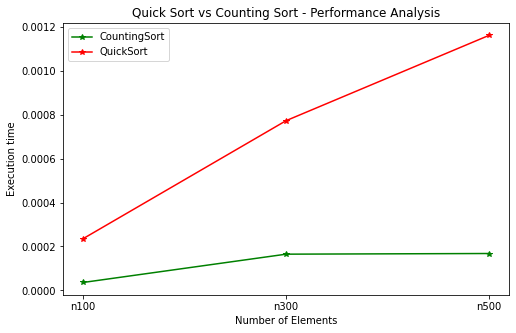

In [ ]:
fig = plt.figure(figsize = (8, 5))

plt.plot(names, c_values, 'green', marker = '*', label="CountingSort")
plt.plot(names, c_qs_values, 'red', marker = '*', label="QuickSort")

plt.xlabel('Number of Elements')
plt.ylabel('Execution time')
plt.title('Quick Sort vs Counting Sort - Performance Analysis')
plt.legend()
plt.show()

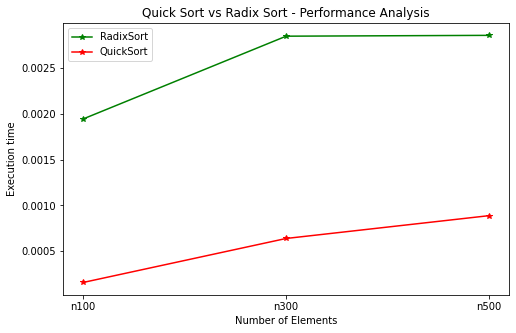

In [ ]:
fig = plt.figure(figsize = (8, 5))

plt.plot(names, r_values, 'green', marker = '*', label="RadixSort")
plt.plot(names, r_qs_values, 'red', marker = '*', label="QuickSort")

plt.xlabel('Number of Elements')
plt.ylabel('Execution time')
plt.title('Quick Sort vs Radix Sort - Performance Analysis')
plt.legend()
plt.show()

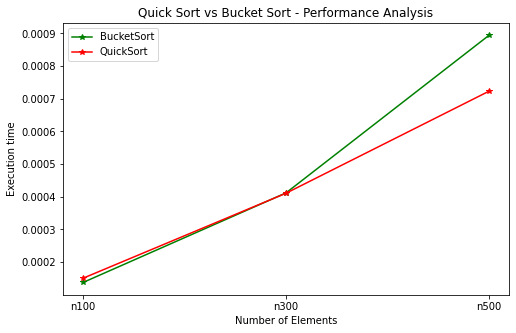

In [ ]:
fig = plt.figure(figsize = (8, 5))

plt.plot(names, b_values, 'green', marker = '*', label="BucketSort")
plt.plot(names, b_qs_values, 'red', marker = '*', label="QuickSort")

plt.xlabel('Number of Elements')
plt.ylabel('Execution time')
plt.title('Quick Sort vs Bucket Sort - Performance Analysis')
plt.legend()
plt.show()